# JURNAL INVESTIGASI
# Eksplorasi Studi Kasus dan Data Interaksi Populasi (Predator–Prey Model)
# Dataset: Isle Royale Wolf–Moose (NPS, 1980–2019)

Misi:
Memastikan data time series siap dianalisis. Data time series sangat sensitif
terhadap urutan waktu dan keberadaan nilai kosong.

Pada tahap awal ini, saya memfokuskan analisis pada struktur data,
kelengkapan data, serta konsistensi indeks waktu.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = [
    (1980, 50, 664),(1981, 30, 650),(1982, 14, 700),(1983, 23, 900),
    (1984, 24, 811),(1985, 22, 1062),(1986, 20, 1025),(1987, 16, 1380),
    (1988, 12, 1653),(1989, 11, 1397),(1990, 15, 1216),(1991, 12, 1313),
    (1992, 12, 1600),(1993, 13, 1880),(1994, 15, 1800),(1995, 16, 2400),
    (1996, 22, 1200),(1997, 24, 500),(1998, 14, 700),(1999, 25, 750),
    (2000, 29, 850),(2001, 19, 900),(2002, 17, 1000),(2003, 19, 900),
    (2004, 29, 750),(2005, 30, 540),(2006, 30, 385),(2007, 21, 450),
    (2008, 23, 650),(2009, 24, 530),(2010, 19, 510),(2011, 16, 515),
    (2012, 9, 750),(2013, 8, 975),(2014, 9, 1050),(2015, 3, 1250),
    (2016, 2, 1300),(2017, 2, 1600),(2018, 2, 1500),(2019, 14, 2060)
]

df = pd.DataFrame(data, columns=["Year", "Wolves", "Moose"])
df["Year"] = pd.to_datetime(df["Year"], format="%Y")
df = df.set_index("Year")

df.head()

,Wolves,Moose
Year,,
1980-01-01,50,664
1981-01-01,30,650
1982-01-01,14,700
1983-01-01,23,900
1984-01-01,24,811


In [4]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40 entries, 1980-01-01 to 2019-01-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Wolves  40 non-null     int64
 1   Moose   40 non-null     int64
dtypes: int64(2)
memory usage: 960.0 bytes


(None,
 Wolves    0
 Moose     0
 dtype: int64)

Narasi Jurnal:
Saya menemukan bahwa dataset memiliki format tahun numerik yang konsisten
dan tidak mengandung nilai NaN. Tidak terdapat gap waktu karena data
tersedia secara tahunan dan berurutan dari 1980 hingga 2019.
Oleh karena itu, tidak diperlukan proses imputasi atau penambalan data.

# Aksi Teknis:
# 1. Plot data mentah
# 2. Bandingkan populasi predator dan prey


Misi:
Mendapatkan gambaran awal perilaku sistem predator–prey secara visual.
Tahap ini bertujuan untuk mengidentifikasi tren, fluktuasi, dan indikasi
interaksi antar populasi.

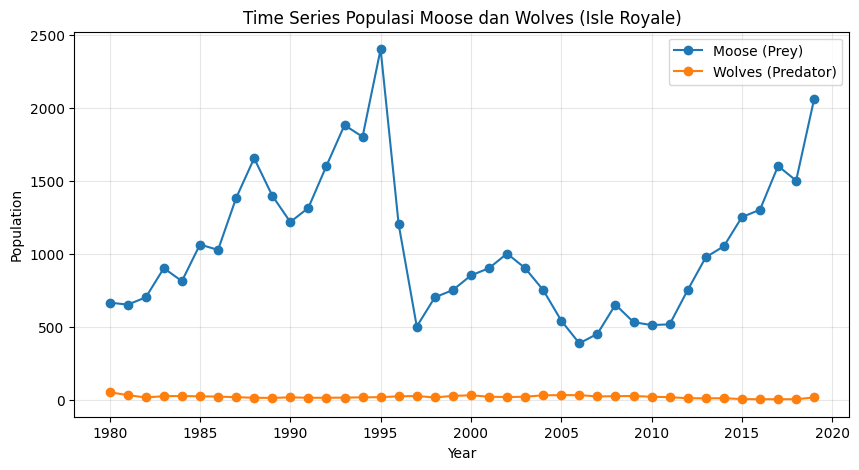

In [5]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df["Moose"], label="Moose (Prey)", marker="o")
plt.plot(df.index, df["Wolves"], label="Wolves (Predator)", marker="o")
plt.title("Time Series Populasi Moose dan Wolves (Isle Royale)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Narasi Jurnal:
Secara visual, terlihat bahwa populasi moose dan wolves menunjukkan
pola naik-turun yang saling berkaitan. Ketika populasi moose meningkat,
populasi wolves cenderung meningkat dengan jeda waktu tertentu.
Sebaliknya, penurunan moose sering diikuti oleh penurunan wolves.
Pola ini mengindikasikan adanya dinamika predator–prey.

# Aksi Teknis:
# 1. Seasonal decomposition (period = 10 tahun sebagai pendekatan siklus ekologis)

Misi:
Memisahkan sinyal utama dari komponen tren jangka panjang dan fluktuasi residual.
Walaupun data bersifat tahunan, proses dekomposisi tetap dilakukan
untuk memahami struktur internal sinyal.

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp_moose = seasonal_decompose(df["Moose"], model="additive", period=10)
decomp_wolves = seasonal_decompose(df["Wolves"], model="additive", period=10)

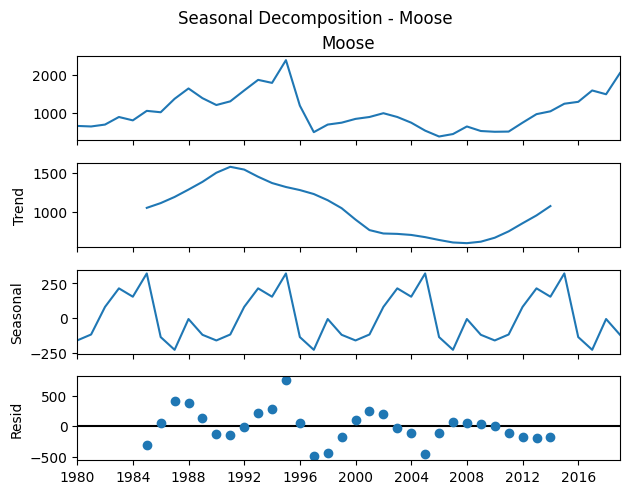

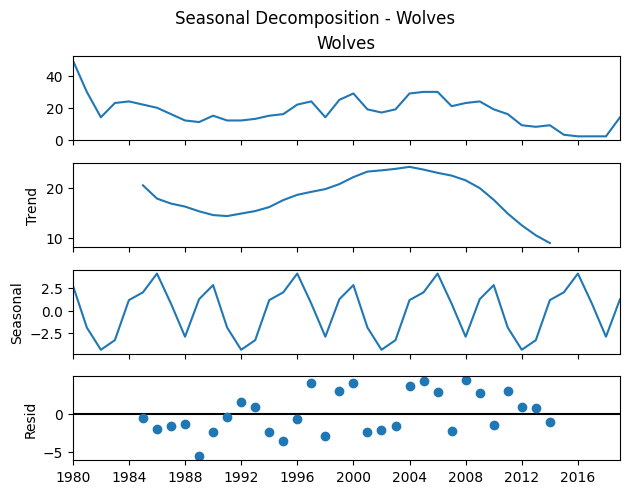

In [7]:
decomp_moose.plot()
plt.suptitle("Seasonal Decomposition - Moose", y=1.02)
plt.show()

decomp_wolves.plot()
plt.suptitle("Seasonal Decomposition - Wolves", y=1.02)
plt.show()

Narasi Jurnal:
Hasil dekomposisi menunjukkan bahwa komponen tren populasi moose
cenderung meningkat dalam jangka panjang, sementara wolves menunjukkan
tren yang lebih fluktuatif. Komponen seasonal menampilkan osilasi
berulang yang konsisten dengan teori predator–prey.
Residual yang cukup besar mengindikasikan adanya faktor eksternal
seperti iklim atau intervensi manusia.

# Aksi Teknis:
# 1. Rolling Mean & Std
# 2. Augmented Dickey-Fuller Test

Misi:
Menguji stabilitas statistik sistem dengan menggunakan rolling statistics
dan uji formal stasioneritas.

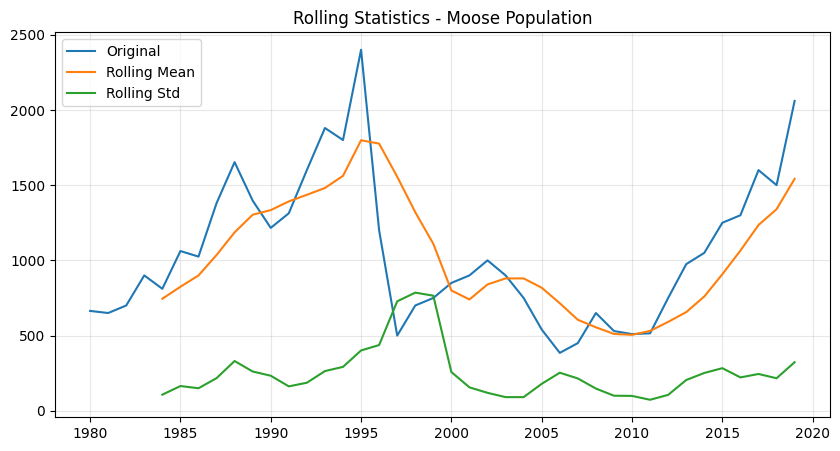

In [8]:
rolling_window = 5

rolling_mean = df["Moose"].rolling(rolling_window).mean()
rolling_std = df["Moose"].rolling(rolling_window).std()

plt.figure(figsize=(10,5))
plt.plot(df.index, df["Moose"], label="Original")
plt.plot(rolling_mean, label="Rolling Mean")
plt.plot(rolling_std, label="Rolling Std")
plt.title("Rolling Statistics - Moose Population")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [9]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df["Moose"])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


ADF Statistic: -1.5922547657677104
p-value: 0.4874830336409443


Narasi Jurnal:
Garis rolling mean yang berubah seiring waktu menunjukkan bahwa data
tidak bersifat stasioner. Hal ini diperkuat oleh uji Augmented Dickey-Fuller
yang menghasilkan p-value di atas 0.05. Dengan demikian, sistem ini
bersifat dinamis dan cocok dimodelkan menggunakan pendekatan
persamaan diferensial seperti Lotka–Volterra.

# Twin Axis Visualization
# Moose (prey) dan Wolves (predator) dengan dua sumbu Y

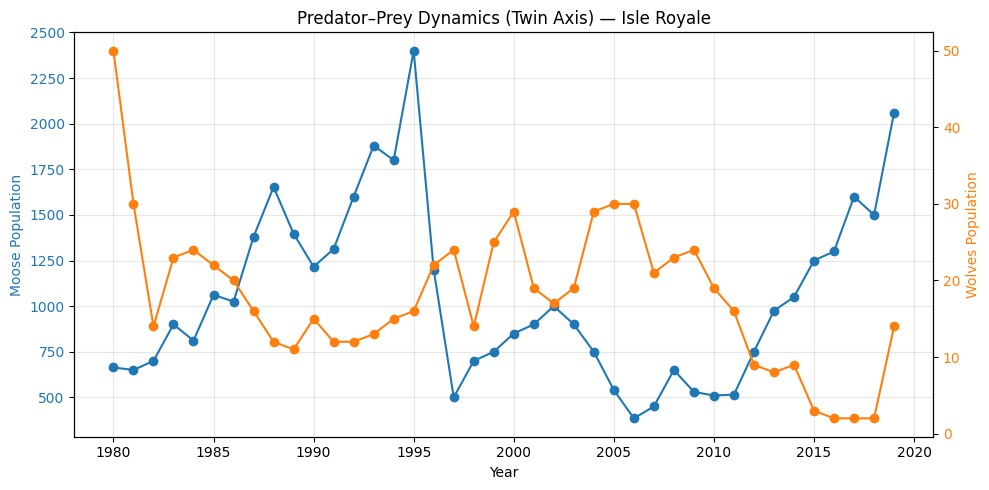

In [10]:
fig, ax1 = plt.subplots(figsize=(10,5))

# Moose (left axis)
ax1.plot(df.index, df["Moose"], marker="o", color="tab:blue", label="Moose (Prey)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Moose Population", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.grid(alpha=0.3)

# Wolves (right axis)
ax2 = ax1.twinx()
ax2.plot(df.index, df["Wolves"], marker="o", color="tab:orange", label="Wolves (Predator)")
ax2.set_ylabel("Wolves Population", color="tab:orange")
ax2.tick_params(axis="y", labelcolor="tab:orange")

plt.title("Predator–Prey Dynamics (Twin Axis) — Isle Royale")
fig.tight_layout()
plt.show()

“Visualisasi dua sumbu memperlihatkan hubungan predator–prey secara lebih jelas.
Ketika populasi moose meningkat, populasi wolves cenderung meningkat dengan jeda waktu tertentu.
Penurunan wolves pada periode 2010–2018 terlihat jelas meskipun populasi moose tetap tinggi.”

# Normalized Time Series (Min-Max Scaling)
# Digunakan untuk membandingkan pola, bukan nilai absolut

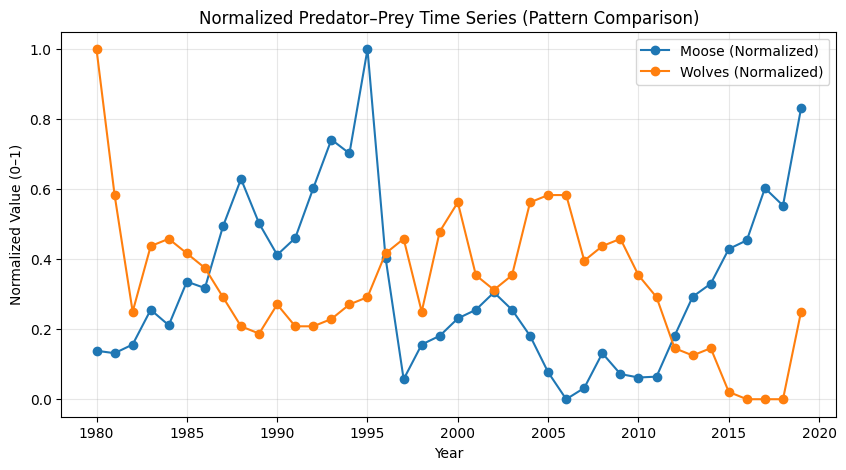

In [11]:
df_norm = (df - df.min()) / (df.max() - df.min())

plt.figure(figsize=(10,5))
plt.plot(df_norm.index, df_norm["Moose"], marker="o", label="Moose (Normalized)")
plt.plot(df_norm.index, df_norm["Wolves"], marker="o", label="Wolves (Normalized)")
plt.title("Normalized Predator–Prey Time Series (Pattern Comparison)")
plt.xlabel("Year")
plt.ylabel("Normalized Value (0–1)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

“Setelah normalisasi, terlihat bahwa pola fluktuasi kedua populasi memiliki bentuk osilasi yang saling mengikuti, meskipun amplitudo aslinya sangat berbeda.”